In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


In [77]:
df = pd.read_csv('UScomments.csv', error_bad_lines=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_2340\3779302275.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('UScomments.csv', error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Acer\AppData\Local\Temp\ipykernel_2340\3779302275.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UScomments.csv', error_bad_lines=False)


In [78]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [79]:
df.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [80]:
df.dropna(subset='comment_text', inplace=True)

## To perform sentiment Analysis


In [81]:
TextBlob('trending 😉').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [82]:
# polarity = []
# for comment in df['comment_text']:
#     polarity.append(TextBlob(comment).sentiment.polarity)

In [83]:
# df['polarity'] = polarity

In [84]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [85]:
# comments_positve = df[df['polarity']==1]

In [86]:
# comments_negative = df[df['polarity']==-1]


## Wordcloud of your positive and negative sentences

In [87]:
# from wordcloud import WordCloud, STOPWORDS

In [88]:
# comments_positve['comment_text']

In [89]:
# total_comments = ' '.join(comments_positve['comment_text'])

In [90]:
# total_comments[0:100]

In [91]:
# wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments)
# plt.figure(figsize=(15,5))
# plt.imshow(wordcloud)
# plt.axis('off')

In [92]:
total_comments = ' '.join(comments_negative['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

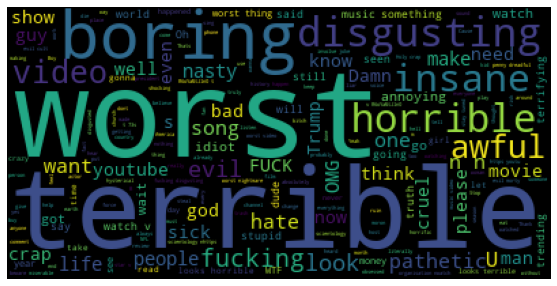

In [93]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## Lets Perform Emoji Analysis

In [114]:
import emoji

In [115]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [116]:
comment = 'trending 😉'


In [117]:
[c for c in comment if c in emoji.EMOJI_DATA]

['😉']

In [118]:
emoji_list = []
for comment in df['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [119]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [120]:
from collections import Counter

In [127]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [125]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [126]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [128]:
freq = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [129]:
freq 

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [131]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [132]:
trace = go.Bar(x = emojis, y = freq)

In [135]:
iplot([trace])

## Collect the Entire data of Youtube

In [1]:
import os

In [8]:
path = 'M:\YouTube\Official Videos\Python\Text Data Analysis\\additional_data'

In [9]:
files = os.listdir(path)

In [10]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [11]:
[i for i in range(1,len(files),2)]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [12]:
files_csv = [files[i] for i in range(0,len(files),2)]

In [14]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [18]:
files_csv[0].split('.')[0][:2]

'CA'

In [20]:
[files_csv[i].split('.')[0][:2]for i in range(0, len(files_csv))]

['CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU', 'US']

In [21]:
len(files_csv)

10

In [26]:
full_df = pd.DataFrame()

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1')
    current_df['Country'] = file.split('.')[0][:2]
    full_df  = pd.concat([current_df, full_df])

In [28]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US


## Which Category has the maximum likes?

In [75]:
cat = pd.read_csv('M:\YouTube\Official Videos\Python\Text Data Analysis\category_file.txt', sep=': \t\t')

C:\Users\Acer\AppData\Local\Temp\ipykernel_7416\2963229704.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  cat = pd.read_csv('M:\YouTube\Official Videos\Python\Text Data Analysis\category_file.txt', sep=': \t\t')


In [76]:
cat.head()

,Category_id Category_name
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


In [77]:
cat.reset_index(inplace=True)

In [78]:
cat.head()

,index,Category_id Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [79]:
cat.columns = ['Category_id', 'Category_name']

In [80]:
cat.head()

,Category_id,Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [81]:
cat.set_index('Category_id',inplace=True)

In [84]:
dct = cat.to_dict()

In [85]:
dct

{'Category_name': {1: 'Film & Animation',
  2: 'Autos & Vehicles',
  10: 'Music',
  15: 'Pets & Animals',
  17: 'Sports',
  18: 'Short Movies',
  19: 'Travel & Events',
  20: 'Gaming',
  21: 'Videoblogging',
  22: 'People & Blogs',
  23: 'Comedy',
  24: 'Entertainment',
  25: 'News & Politics',
  26: 'Howto & Style',
  27: 'Education',
  28: 'Science & Technology',
  29: 'Nonprofits & Activism',
  30: 'Movies',
  31: 'Anime/Animation',
  32: 'Action/Adventure',
  33: 'Classics',
  34: 'Comedy',
  35: 'Documentary',
  36: 'Drama',
  37: 'Family',
  38: 'Foreign',
  39: 'Horror',
  40: 'Sci-Fi/Fantasy',
  41: 'Thriller',
  42: 'Shorts',
  43: 'Shows',
  44: 'Trailers'}}

In [86]:
dct['Category_name']

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [87]:
full_df['Category_name'] = full_df['category_id'].map(dct['Category_name'])

In [88]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'Country', 'Category_name'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'People & Blogs'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Science & Technology'),
  Text(4, 0, 'Film & Animation'),
  Text(5, 0, 'News & Politics'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Pets & Animals'),
  Text(9, 0, 'Education'),
  Text(10, 0, 'Howto & Style'),
  Text(11, 0, 'Autos & Vehicles'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Gaming'),
  Text(14, 0, 'Nonprofits & Activism'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

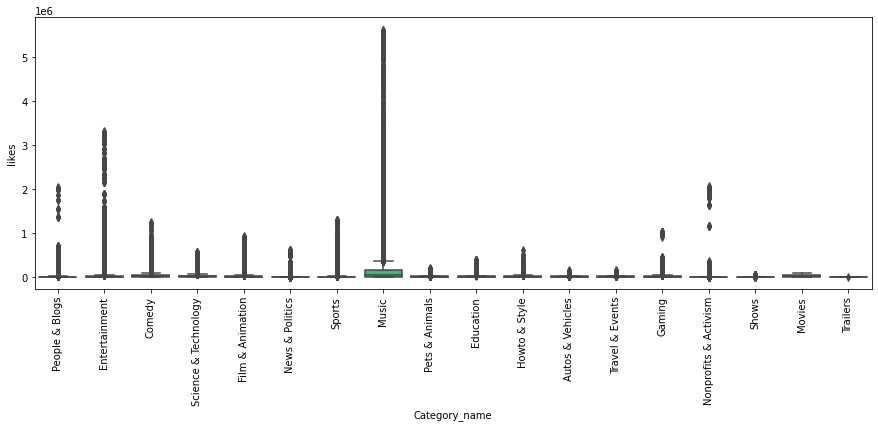

In [93]:
plt.figure(figsize=(15,5))
sns.boxplot(x=full_df['Category_name'], y=full_df['likes'])
plt.xticks(rotation='vertical')


## Analysing relationship between views and likes

<AxesSubplot:xlabel='views', ylabel='likes'>

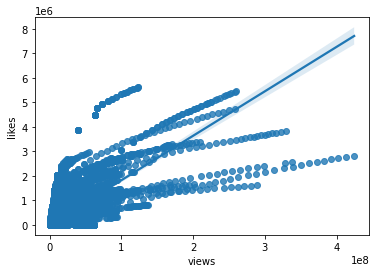

In [95]:
sns.regplot(data=full_df, x='views', y='likes')

<AxesSubplot:>

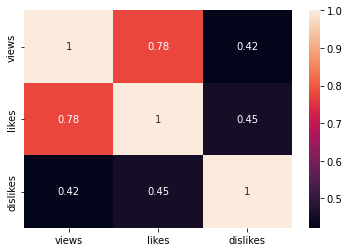

In [100]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(), annot =True)

## Which channels have the largest number of trending videos?

In [119]:
tdf = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [120]:
import plotly.express as px

In [121]:
tdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [123]:
px.bar(tdf[:20], x = 'channel_title', y='total_videos')